In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## EDA

In [5]:
# checking for null values

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

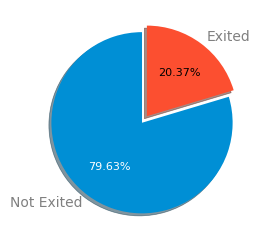

In [6]:
values = df.Exited.value_counts()
labels = ["Not Exited", "Exited"]

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True, startangle = 90, explode = explode)

plt.setp(texts, color = "grey")
plt.setp(autotexts, size = 8, color = "white")
autotexts[1].set_color("black")
plt.show()

20 % of the custormers have churned and 80 % haven't

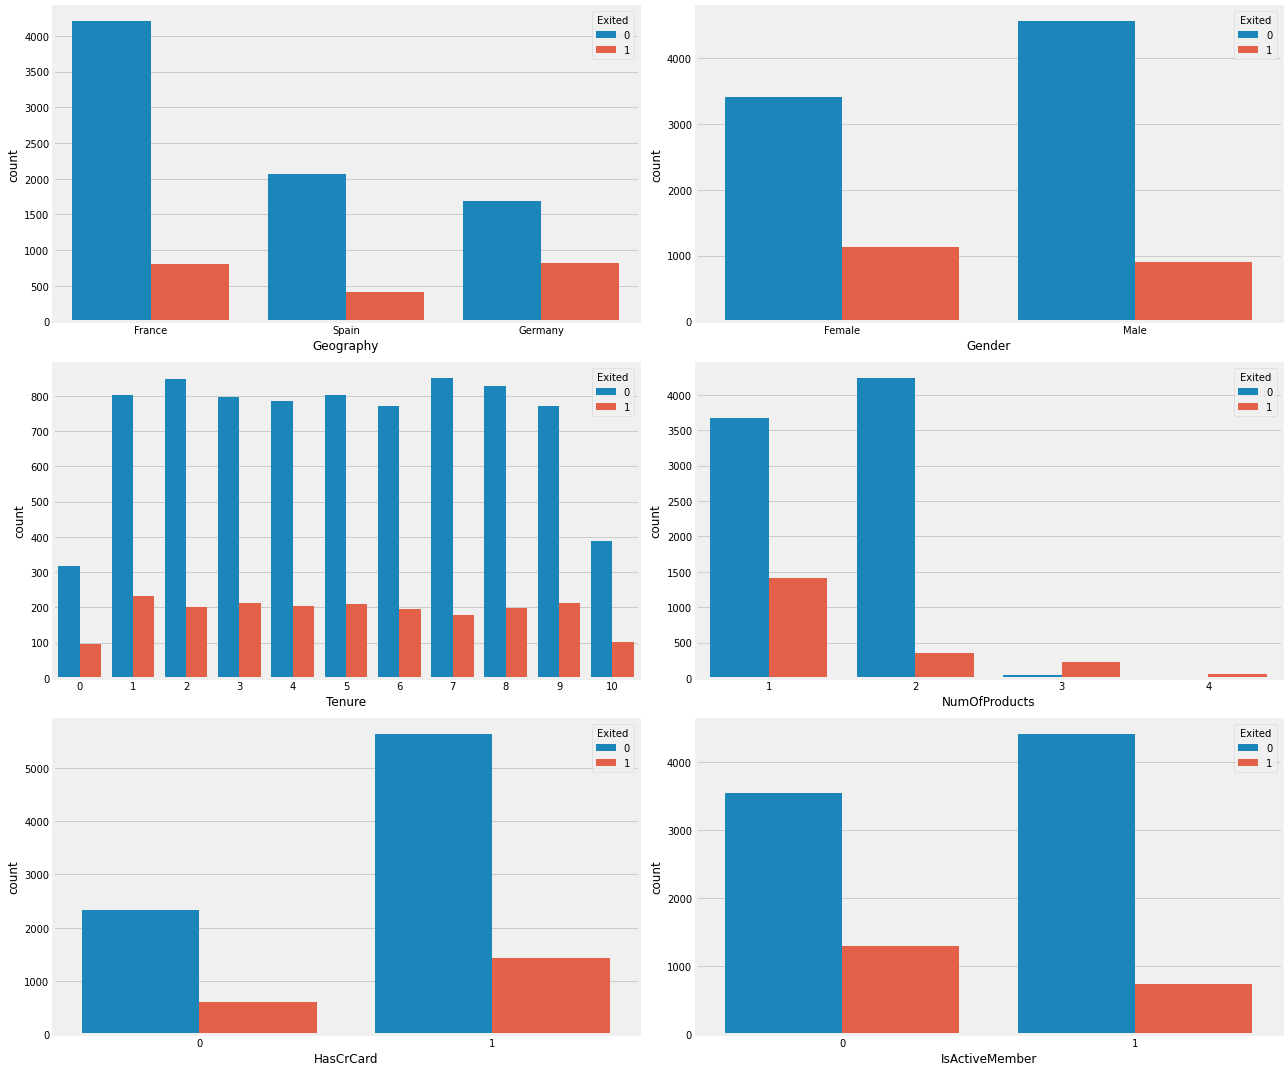

In [7]:
# visualizing catagorical variable

fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot("Geography", hue = "Exited", data = df, ax = ax[0][0])
sns.countplot("Gender", hue = "Exited", data = df, ax = ax[0][1])
sns.countplot("Tenure", hue = "Exited", data = df, ax = ax[1][0])
sns.countplot("NumOfProducts", hue = "Exited", data = df, ax = ax[1][1])
sns.countplot("HasCrCard", hue = "Exited", data = df, ax = ax[2][0])
sns.countplot("IsActiveMember", hue = "Exited", data = df, ax = ax[2][1])

plt.tight_layout()
plt.show()

**From above plots we can conclude that:-**



*   Majority of customers are from france but most customers which churned are from germany maybe because of lack of resources as there are not many customers.
*   The proportion of female customers churning is also greater than that of female customers.

*   Majority of customers have tenure between 1 to 9 and churning rate is also high between these tenure.
*   Most of the customers have 1 or 2 products and most customers which churned are having 1 products maybe they are not satisfied so they are churning,



*   Intrestingly, majority of customers that churned are those with credit cards but this can be coincidence as majority of customers have credit cards.
*   Unsurprisingly the inactive members have greater churn and the overall proportion of inactive members is also high.





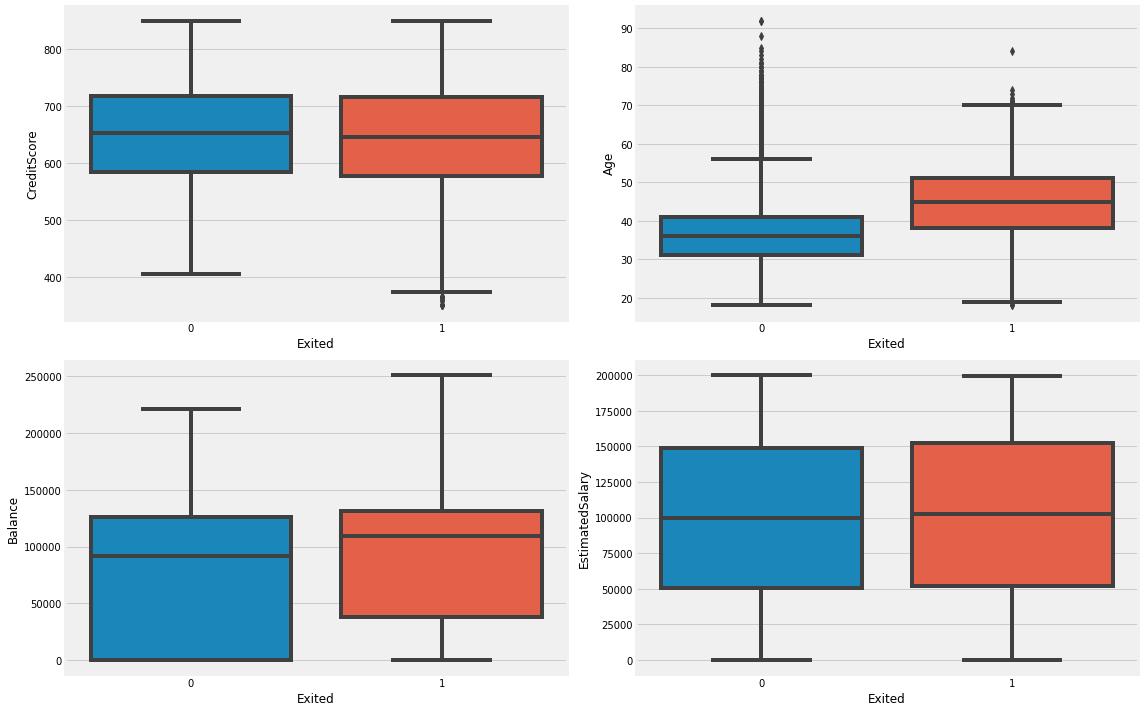

In [8]:
# visualizning contineous variable

fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = "Exited", y = "CreditScore", data = df, ax = ax[0][0])
sns.boxplot(x = "Exited", y = "Age", data = df, ax = ax[0][1])
sns.boxplot(x = "Exited", y = "Balance", data = df, ax = ax[1][0])
sns.boxplot(x = "Exited", y = "EstimatedSalary", data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

**From above plots we can conclude that:-**



*   There is no significant difference in credit score distribution between customers which are chured are not.

*   The older customers are churning more than younger ones.

*   Bank is loosing customers with significant bank balance.
*   Estimated salary does not have a significance on the likelihood to churn.


*   Intrestingly, majority of customers that churned are those with credit cards but this can be coincidence as majority of customers have credit cards.


*   Unsurprisingly the inactive members have a greater churn and the overall proportion of inactive members is also high.



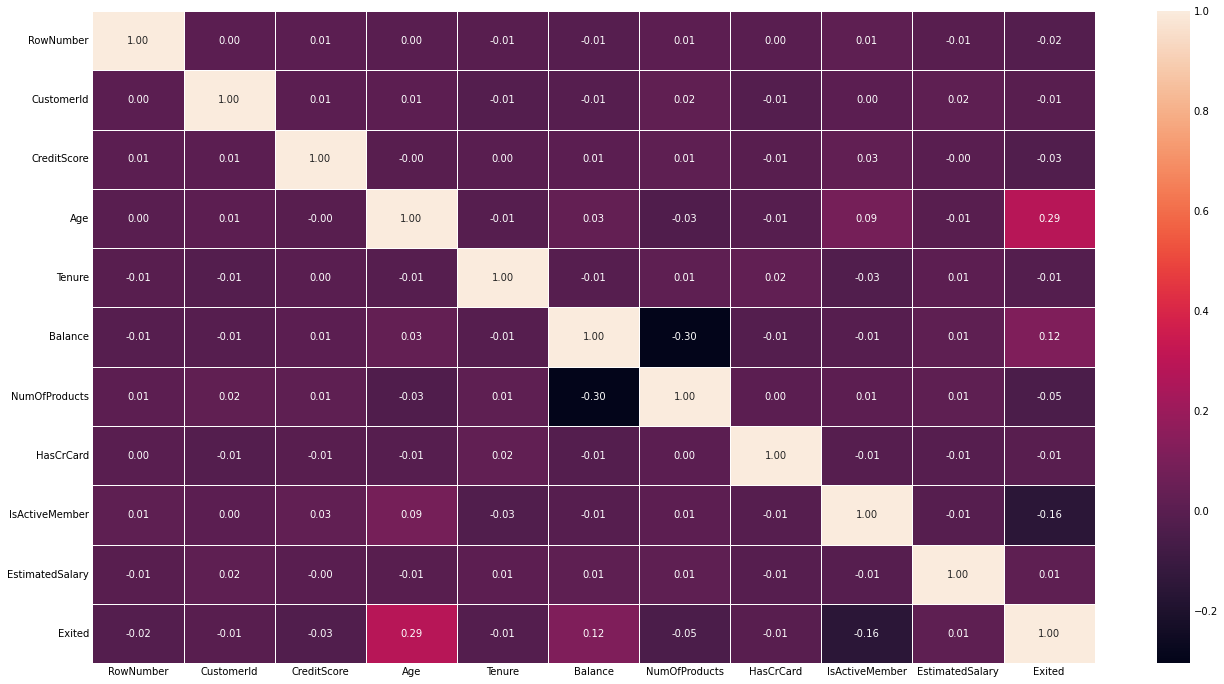

In [9]:
# heatmap

plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

We can say that there is no multicolinearity present in data.

In [10]:
# droping unnecessary columns

df.drop(columns = ["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
# Encoding catagorical variable

df["Geography"] = df["Geography"].map({"France" : 0, "Germany" : 1, "Spain" : 2})
df["Gender"] = df["Gender"].map({"Male" : 0, "Female" : 1})

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# creating feature and label

from tensorflow.keras.utils import to_categorical

X = df.drop("Exited", axis = 1)
y = to_categorical(df.Exited)

In [20]:
# splitting data into training set and test set

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [22]:
# Scaling data 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building ANN

In [32]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = "normal", activation = "relu", input_shape = (10,)))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding third hidden layer
model.add(Dense(7, kernel_initializer = "normal", activation = "relu"))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding output layer
model.add(Dense(2, kernel_initializer = "normal", activation = "sigmoid"))

# compiling the model
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# fitting the model to the training set

model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
235/235 [==============================] - 3s 5ms/step - loss: 0.6075 - accuracy: 0.7421 - val_loss: 0.5457 - val_accuracy: 0.7844
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4413 - accuracy: 0.8201 - val_loss: 0.4168 - val_accuracy: 0.8208
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3906 - accuracy: 0.8449 - val_loss: 0.3738 - val_accuracy: 0.8420
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3856 - accuracy: 0.8424 - val_loss: 0.3620 - val_accuracy: 0.8516
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3801 - accuracy: 0.8476 - val_loss: 0.3550 - val_accuracy: 0.8568
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3741 - accuracy: 0.8461 - val_loss: 0.3614 - val_accuracy: 0.8476
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3761 - accuracy: 0.8468 - val_loss: 0.3574 - val_accuracy: 0.8496

## Visualizing Training and Validation Loss

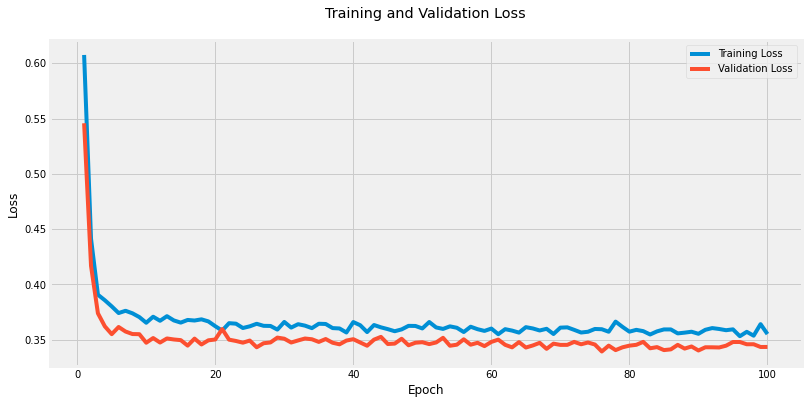

In [33]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history["loss"]
val_loss =model_history.history["val_loss"]
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = "Training Loss")
sns.lineplot(epoch, val_loss, label = "Validation Loss")
plt.title("Training and Validation Loss\n")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Visualizing Training and Validation accuracy

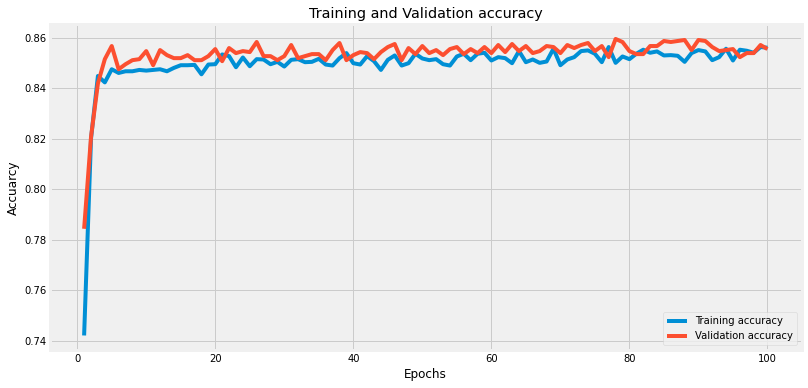

In [35]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history["accuracy"]
val_loss = model_history.history["val_accuracy"]
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = "Training accuracy")
sns.lineplot(epoch, val_loss, label = "Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuarcy")
plt.legend()
plt.show()

In [36]:
acc = model.evaluate(X_test, y_test)[1]

print(f"Accuracy of model is {acc}")

79/79 [==============================] - 0s 5ms/step - loss: 0.3434 - accuracy: 0.8556
Accuracy of model is 0.8555999994277954


In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 7)                 77        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 batch_normalization_1 (Batc  (None, 7)                28        
 hNormalization)                                      